In [48]:
"""
(*)~---------------------------------------------------------------------------
Blink analyses tool using eye-tracking data from pupil GUI by pupil-labs.com

this code gathers blink meta data out of the pupil GUI export files 
gaze_positions.csv and blinks.csv 

    - gaze confidence histogram
    pupil detects blinks by flagging fast confidence drops. If high gaze confidence 
    percentage is lower than 80%, there might be other reasons for low gaze 
    confidence than blinks, hence blink data might be not reliable in regard to 
    frequency, duration, .. 
    - blinks duration histogram 
    spontaneous blinks are rarely longer then 1.5-2s. Longer durations indicate 
    inaccurate detection, possibly due to lower gaze confidence percentage
    - gaze distribution in world camera / cartesian grid [0, 0 ] bottom left 
    indicates matching of regions of interest during recording with world camera 
    field of view. Might indicate error sources. 

Distributed under the terms of the GNU
Lesser General Public License (LGPL v3.0).
See COPYING and COPYING.LESSER for license details.
author: p.wagner@unsw.edu.au 
---------------------------------------------------------------------------~(*)
"""
import numpy as np
import pandas as pd
import os.path
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm

# TODO: gaze distribution >> filter low confidence data out 


In [49]:
# set file path of recording
recording_fp = r'C:\Users\p.wagner\recordings\2020_04_10\003'
export = r'exports\000'

# check if source files are available or list unavailable source files 
fns = [
    os.path.join(recording_fp, export, 'gaze_positions.csv'),
    os.path.join(recording_fp, export, 'blinks.csv'),
]

if not all([os.path.isfile(fn) for fn in fns]):
    for fn in fns:
        if not os.path.isfile(fn):
            print(fn)
    exit("Source files missing ")

# load gaze_positions.csv and blinks.csv
gaze_positions = pd.read_csv(fns[0], index_col="gaze_timestamp")
blink_data = pd.read_csv(fns[1], index_col="id")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

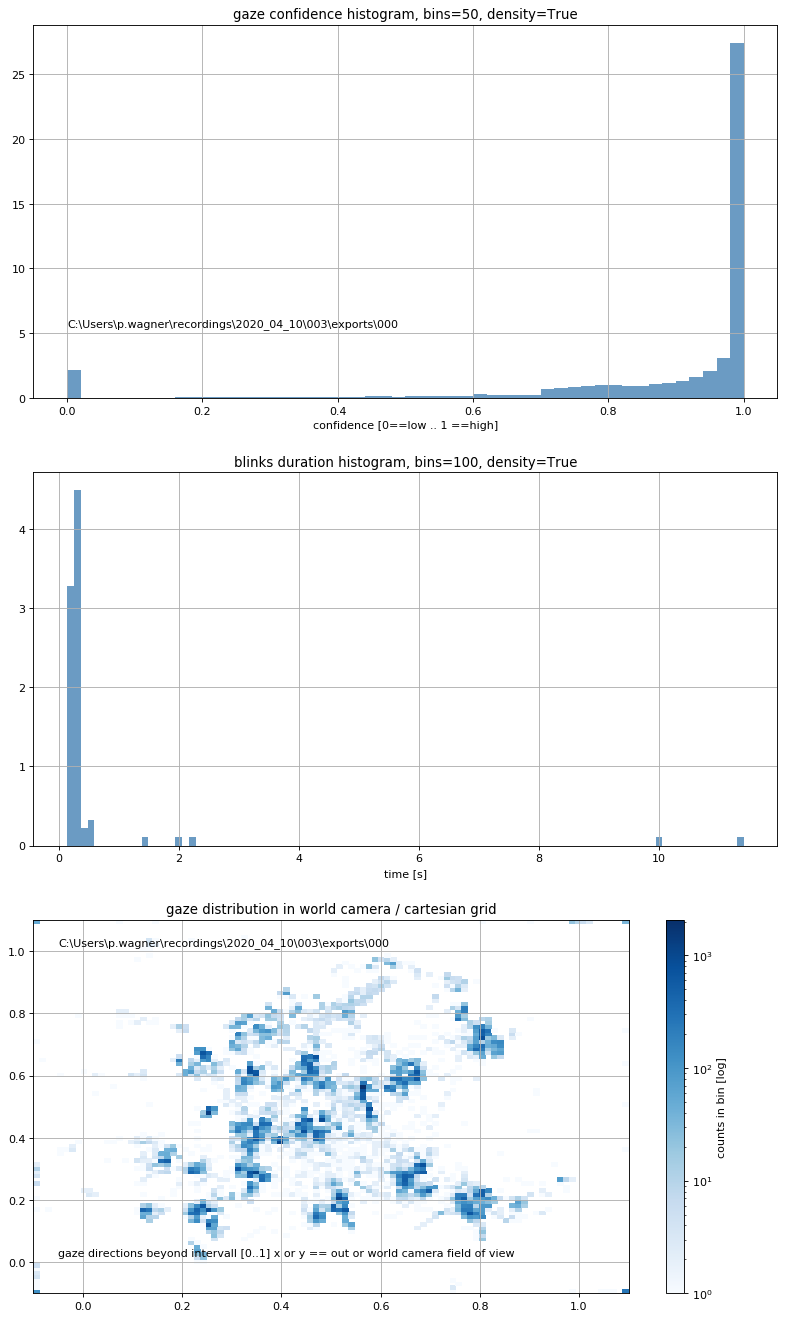

In [52]:

plt.figure(num=None, figsize=(12,21), dpi=80, facecolor='w', edgecolor='k')

# gaze confidence histogram
plt.subplot(3, 1, 1)
plt.hist(gaze_positions.loc[:,'confidence'], bins=50, density=True, alpha=0.8,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.title('gaze confidence histogram, bins=50, density=True')
plt.xlabel('confidence [0==low .. 1 ==high]')
plt.grid()
plt.text(0, 5.5, os.getcwd())

# blinks duration histogram
plt.subplot(3, 1, 2)
plt.hist(blink_data.loc[:,'duration'], bins=100, density=True, alpha=0.8,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.title('blinks duration histogram, bins=100, density=True')
plt.grid()
plt.xlabel('time [s]')


# gaze distribution in world camera / cartesian grid

# # filter low confidence gaze data 
gaze_positions.norm_pos_x[gaze_positions.confidence < .7] = np.nan
gaze_positions.norm_pos_y[gaze_positions.confidence < .7] = np.nan

# # set far off world camera view to .1 beyond the grid
gaze_positions.norm_pos_y[gaze_positions.norm_pos_y > 1.10] = 1.10
gaze_positions.norm_pos_y[gaze_positions.norm_pos_y < -.10] = -.10
gaze_positions.norm_pos_x[gaze_positions.norm_pos_x > 1.10] = 1.10
gaze_positions.norm_pos_x[gaze_positions.norm_pos_x < -.10] = -.10

# # plot histogram 
plt.subplot(3, 1, 3)
x = gaze_positions.norm_pos_x[~np.isnan(gaze_positions.norm_pos_x)]
y = gaze_positions.norm_pos_y[~np.isnan(gaze_positions.norm_pos_y)]       
plt.hist2d(x, -y +1.00, bins=100, cmap='Blues', norm=LogNorm())
plt.title('gaze distribution in world camera / cartesian grid')
plt.grid()
plt.text(-.05, 1.02, os.getcwd())
plt.text(-.05, 0.02, 'gaze directions beyond intervall [0..1] x or y == out or world camera field of view')
cb = plt.colorbar()
cb.set_label('counts in bin [log]')
plt.savefig(os.path.join(recording_fp, export, 'blinks_meta_data.pdf'))
plt.show()

In [51]:
x


gaze_timestamp
1320.745224    0.249136
1320.749084    0.250360
1320.753354    0.250070
1320.757544    0.249759
1320.761435    0.250471
1320.765266    0.250227
1320.769247    0.248759
1320.773203    0.248507
1320.777127    0.249361
1320.783063    0.250510
1320.787052    0.250175
1320.791033    0.250171
1320.794983    0.249931
1320.799060    0.248699
1320.803291    0.248441
1320.807269    0.249751
1320.811793    0.249476
1320.816055    0.248809
1320.819448    0.248603
1320.824790    0.249376
1320.828633    0.250901
1320.831149    0.251534
1320.833393    0.314765
1320.851971    0.251328
1320.855424    0.251133
1320.858594    0.250958
1320.867085    0.251820
1320.875300    0.252559
1320.878619    0.252297
1320.881888    0.251631
                 ...   
1737.111989    0.526814
1737.114955    0.526748
1737.118329    0.526553
1737.121425    0.526762
1737.125970    0.526824
1737.130511    0.469447
1737.134027    0.469744
1737.137539    0.469782
1737.141619    0.469424
1737.145661    0.468777
1